In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

C:\Users\WIN-11\AppData\Local\Temp\ipykernel_12768\1706459297.py:11: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  provider = IBMQ.load_account()


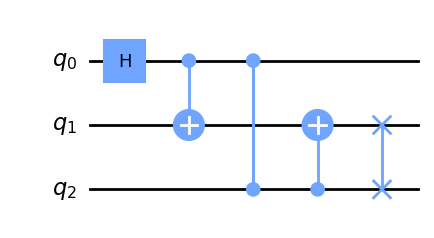

In [13]:
circuit = QuantumCircuit(3)
circuit.h(0)
circuit.cx(0,1)
circuit.cz(0,2)
circuit.cx(2,1)
circuit.swap(1, 2)
circuit.draw('mpl')


In [3]:
from qiskit.quantum_info import Statevector
import seaborn

In [4]:
state = Statevector.from_int(0, 2**3)
e_state = state.evolve(circuit)
e_state.draw('latex')

<IPython.core.display.Latex object>

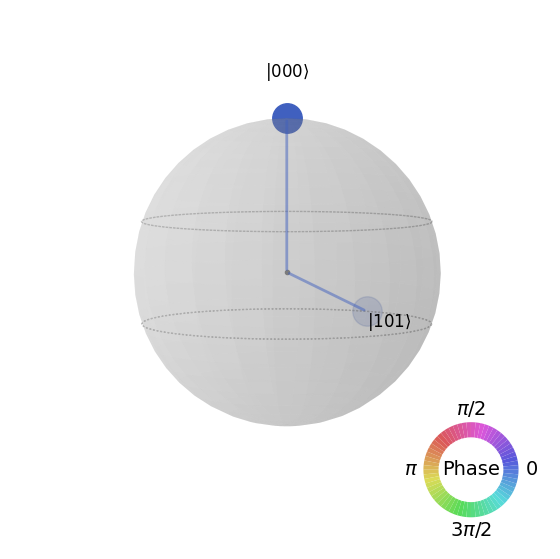

In [5]:
e_state.draw('qsphere')

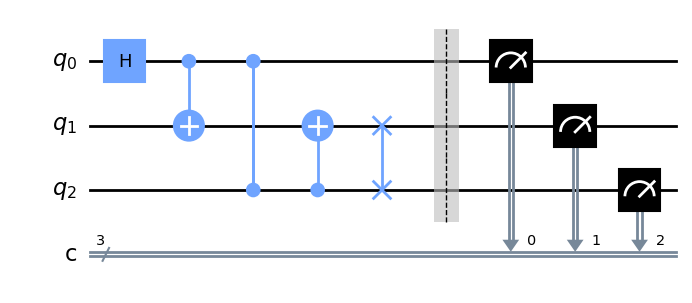

In [6]:
measure = QuantumCircuit(3,3)
measure.barrier(range(3))
measure.measure(range(3), range(3))
qc = measure.compose(circuit, range(3), front=True)
qc.draw('mpl')


In [7]:
class QuantumBackend:
    def __init__(self, backend):
        self.backend = backend
        self.transpiled = None
        self.compiled_job = None
        self.result = None
    
    def transpile(self, circuit):
        self.transpiled = transpile(circuit, self.backend)
        
    def run(self, shots = 1024):
        if self.transpiled != None:
            self.compiled_job = self.backend.run(self.transpiled, shots = shots)
            self.result = self.compiled_job.result()
            return self.result
        else: raise Exception("Transpile QuantumCircuit terlebih dahulu!")
    
    def get_counts(self):
        if self.result != None:
            return self.result.get_counts(self.transpiled)
        else: raise Exception("Back-end belum di'run'!")
        

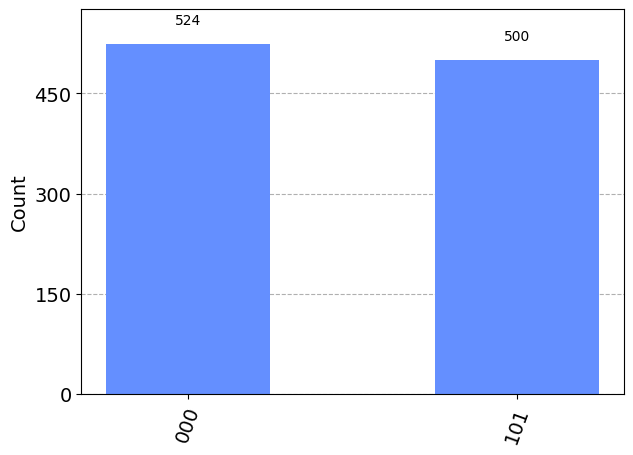

In [8]:
simulator = QasmSimulator()
backend = QuantumBackend(simulator)
backend.transpile(qc)
backend.run()
counts = backend.get_counts()

plot_histogram(counts)



In [9]:
quancir = QuantumCircuit(3)
quancir.h(0)
quancir.cx(0,1)
quancir.cx(0,2)
quancir.draw()

┌───┐          
q_0: ┤ H ├──■────■──
     └───┘┌─┴─┐  │  
q_1: ─────┤ X ├──┼──
          └───┘┌─┴─┐
q_2: ──────────┤ X ├
               └───┘

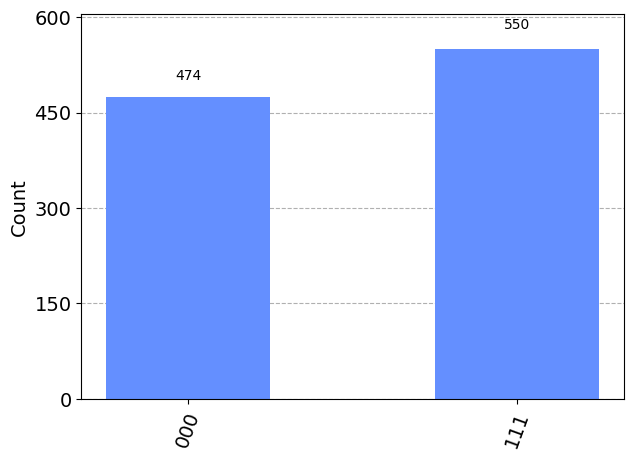

In [10]:
quancir_m = QuantumCircuit(3,3)
quancir_m.barrier(range(3))
quancir_m.measure(range(3),range(3))
quancir_mr = quancir_m.compose(quancir, range(3), front = True)
quancir_mr.draw()
backend.transpile(quancir_mr)
backend.run()
counts = backend.get_counts()
plot_histogram(counts)


In [11]:
state_quancir = Statevector.from_int(0, 2**3)
state_a = state_quancir.evolve(quancir)
state_a.draw('latex')


<IPython.core.display.Latex object>

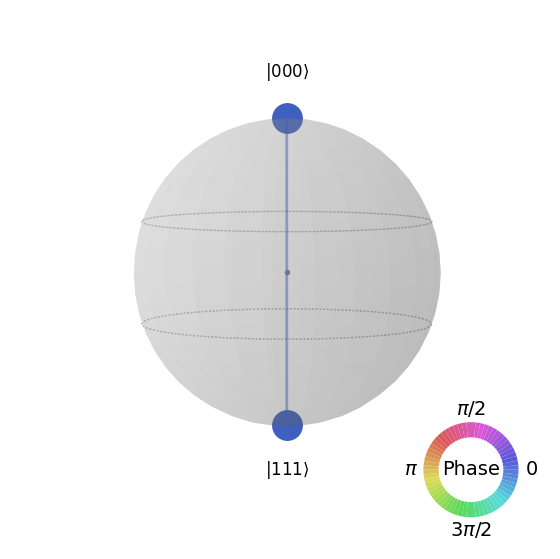

In [12]:
state_a.draw('qsphere')